# New York taxi trips

In [1]:
# Importar librerias para analisis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Cargar los datos de properati
df_york = pd.read_csv("1. New york taxi.csv")
df_york.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## Analisis exploratorio

In [3]:
# número de filas y columnas
df_york.shape

(1458644, 11)

In [4]:
### Información
df_york.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
### Pasar fechas de viaje a formato fecha 

df_york['pickup_datetime'] = pd.to_datetime(df_york.pickup_datetime)
df_york['dropoff_datetime'] = pd.to_datetime(df_york.dropoff_datetime)                                            

In [6]:
#Resampleo para miarar la cantidad de pasajeros transportados por semana
sem = df_york[['passenger_count','pickup_datetime']].resample('W', on = 'pickup_datetime').sum()
print(sem.shape)
sem.head()

(27, 1)


,passenger_count
pickup_datetime,
2016-01-03,35589
2016-01-10,88773
2016-01-17,94937
2016-01-24,74643
2016-01-31,90644


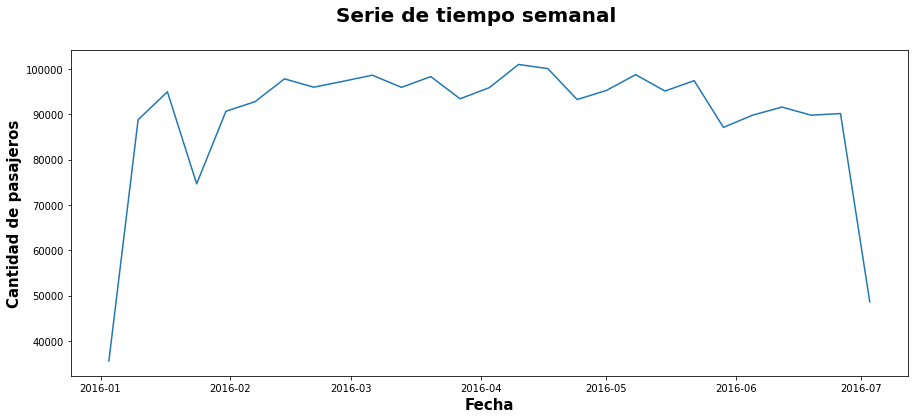

In [7]:
## Comportamiento de los viajes por semana

plt.figure(figsize = (15,6))
plt.suptitle('Serie de tiempo semanal' , fontweight = 'black', fontsize=20)
plt.plot(sem.index, sem.passenger_count)
plt.xlabel('Fecha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de pasajeros',fontweight = "black", fontsize = 15)
plt.show()

In [8]:
df_york.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [9]:
# Día de la semana que se hizo el viaje
df_york['dia_pickup'] = df_york['pickup_datetime'].dt.day_name()

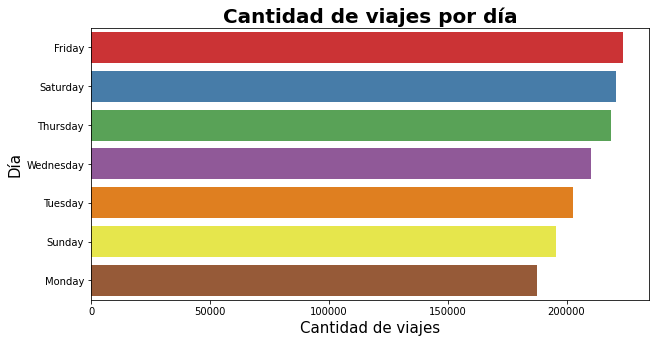

In [10]:
# Cantidad de viajes por día
plt.figure(figsize=(10,5))
ax1 = sns.countplot(y='dia_pickup',data=df_york,palette="Set1",order= df_york['dia_pickup'].value_counts().index);
ax1.set_title('Cantidad de viajes por día',fontweight = 'black', fontsize=20);
ax1.set_ylabel('Día',fontsize=15);
ax1.set_xlabel('Cantidad de viajes',fontsize=15);

Se puede observar que los días que de finalización de la semana son loq ue tienen mayor cantidad de de viajes.

## Tratamiento de datos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


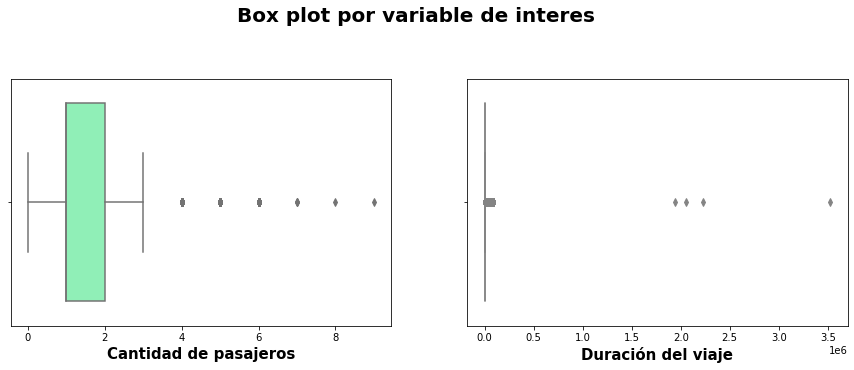

In [11]:
# Diagrama de caja y bigotes para las variables númericas que no sean latitudes y longitudes

plt.figure(figsize=(15,10))
plt.suptitle('Box plot por variable de interes' , fontweight = 'black', fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(df_york['passenger_count'],palette='rainbow')
plt.xlabel("Cantidad de pasajeros", fontweight = "black", fontsize = 15)

plt.subplot(2,2,2)
sns.boxplot(df_york['trip_duration'],palette='coolwarm')
plt.xlabel("Duración del viaje", fontweight = "black", fontsize = 15);

Revisando el diagrama de cajas y bigotes, la variable cantidad de pasajeros tiene pocos datos outliers y presenta una buena distribución de los datos, a diferencia de la duración de los viajes, la cual presenta mas datos outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


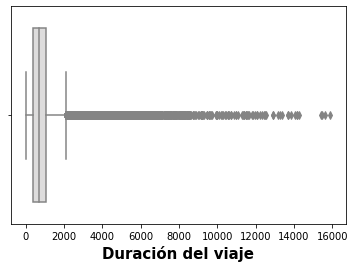

In [12]:
# Con la regla de las 3 sigma, se usan 3 sigma para determinar los valores atipícos para la variable duración de viajes

for col in ["trip_duration"]:
    desviacion_estandard = df_york[col].std()
    media = df_york[col].mean()

    outliers = (df_york[col] > (media + (desviacion_estandard*3))) | (df_york[col] < (media - (desviacion_estandard*3)))
    df_york.loc[outliers, col] = np.nan
    

sns.boxplot(df_york['trip_duration'],palette='coolwarm')
plt.xlabel("Duración del viaje", fontweight = "black", fontsize = 15);

Empleando la regla de los 3 sigmas de mejora la distribución de la caja entre sus rango intercuartilico, sin embargo aún se tienes algunos outliers

In [13]:
### Datos faltantes
print('Porcentaje de valores faltantes por columna:\n',df_york.isna().sum() / df_york.shape[0] * 100, sep = "")

Porcentaje de valores faltantes por columna:
id                    0.000000
vendor_id             0.000000
pickup_datetime       0.000000
dropoff_datetime      0.000000
passenger_count       0.000000
pickup_longitude      0.000000
pickup_latitude       0.000000
dropoff_longitude     0.000000
dropoff_latitude      0.000000
store_and_fwd_flag    0.000000
trip_duration         0.142118
dia_pickup            0.000000
dtype: float64


Se remueven los datos faltantes de trip_duration ya que debido a proceso de dectección de outliers se marcaron  con nan para removerlos

In [14]:
df_york.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

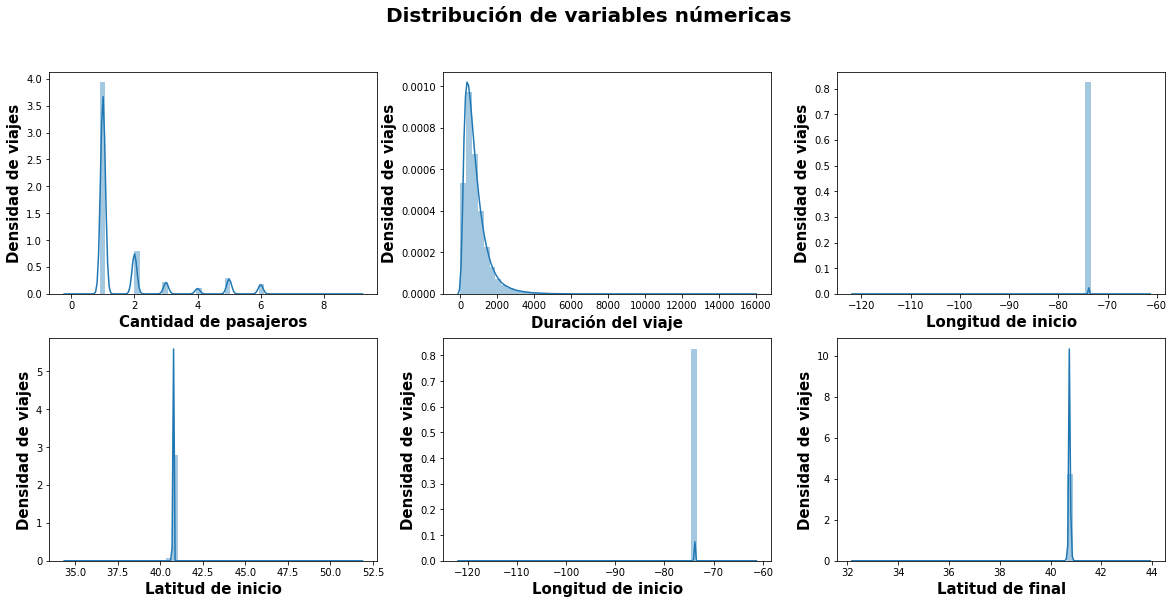

In [15]:
# Se muestra la distribución de las variables númericas discretas y continuas

plt.figure(figsize=(20,9))
plt.suptitle('Distribución de variables númericas' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.distplot(df_york['passenger_count']);
plt.xlabel("Cantidad de pasajeros", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de viajes", fontweight = "black", fontsize = 15)

plt.subplot(2,3,2)
sns.distplot(df_york['trip_duration']);
plt.xlabel("Duración del viaje", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de viajes", fontweight = "black", fontsize = 15)

plt.subplot(2,3,3)
sns.distplot(df_york['pickup_longitude']);
plt.xlabel("Longitud de inicio", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de viajes", fontweight = "black", fontsize = 15)

plt.subplot(2,3,4)
sns.distplot(df_york['pickup_latitude']);
plt.xlabel("Latitud de inicio", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de viajes", fontweight = "black", fontsize = 15)

plt.subplot(2,3,5)
sns.distplot(df_york['dropoff_longitude']);
plt.xlabel("Longitud de final", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de viajes", fontweight = "black", fontsize = 15)

plt.subplot(2,3,6)
sns.distplot(df_york['dropoff_latitude']);
plt.xlabel("Latitud de final", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de viajes", fontweight = "black", fontsize = 15);

Se puede observar que para la distribución de las variable duración de viajes la distribución muestra una asimetría positiva, ya que la cola de la distribución se alarga (a la derecha) para valores superiores a la media y el nivel de curtosis muestra un grado de concentración normal de los datos. Con la longitud y latitud de inicio y final no se puede inferir mucho a cerca de su distribución

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


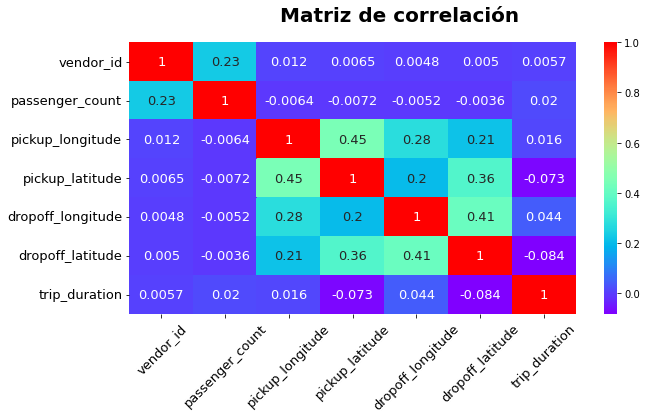

In [16]:
# Correlación de entre las variables númericas
plt.figure(figsize=(10,5))
sns.heatmap(df_york.corr('kendall'),cmap='rainbow',annot_kws={'size': 13},annot=True);
plt.xticks(fontsize = 13, rotation = 45)
plt.yticks(fontsize = 13)
plt.suptitle('Matriz de correlación' , fontweight = 'black', fontsize=20);

La correlación entre las variables no es muy significativa, ya que ninguna supera el 0.5 en su coeficiente, donde de emplea el coeficiente de kendall por la diferencia de escala de las variables

## Encoding y escalado

In [17]:
# Codificación de la variable categoríca dia del viaje
df_york = pd.get_dummies(df_york, columns=["dia_pickup"])

In [18]:
df_york.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456571 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1456571 non-null  object        
 1   vendor_id             1456571 non-null  int64         
 2   pickup_datetime       1456571 non-null  datetime64[ns]
 3   dropoff_datetime      1456571 non-null  datetime64[ns]
 4   passenger_count       1456571 non-null  int64         
 5   pickup_longitude      1456571 non-null  float64       
 6   pickup_latitude       1456571 non-null  float64       
 7   dropoff_longitude     1456571 non-null  float64       
 8   dropoff_latitude      1456571 non-null  float64       
 9   store_and_fwd_flag    1456571 non-null  object        
 10  trip_duration         1456571 non-null  float64       
 11  dia_pickup_Friday     1456571 non-null  uint8         
 12  dia_pickup_Monday     1456571 non-null  ui

In [19]:
# Importar escalador
from sklearn.preprocessing import StandardScaler
escalado = df_york[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'
                   ,'dia_pickup_Friday','dia_pickup_Monday','dia_pickup_Saturday','dia_pickup_Sunday','dia_pickup_Thursday',
                   'dia_pickup_Tuesday','dia_pickup_Wednesday']]

X_escalada = StandardScaler().fit_transform(escalado)

X_escalada = pd.DataFrame(X_escalada,columns =escalado.columns )

## Modelado de Regresión

In [20]:
#Importat librerias
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [21]:
X = X_escalada
y = df_york.trip_duration
X_train, X_test, y_train, y_test = train_test_split(X, # variable independiente
                                                    y, # variable dependiente
                                                    test_size = 0.2) # Porcentaje de datos para la evaluación

In [22]:
##### Codigo para optimización de parametros

from sklearn.model_selection import RandomizedSearchCV
#Espacio de búsqueda de cada hiperparámetro para random forest
rf_grid = {"n_estimators": np.arange(20,50, 10),
           "max_depth": [None,10,15,20,30],
           "min_samples_leaf": np.arange(10, 20, 2),
           "max_features": [10,15,20,"sqrt", "auto"]}

# Búsqueda por validación cruzada para random forest
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              scoring    = 'neg_root_mean_squared_error',
                              n_iter=5,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [None, 10, 15, 20, 30],
                                        'max_features': [10, 15, 20, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([10, 12, 14, 16, 18]),
                                        'n_estimators': array([20, 30, 40])},
                   scoring='neg_root_mean_squared_error', verbose=True)

In [23]:
# Función para ver el mejor parametro para el modelo, derivado del RandomizedSearchCV
def show_parametro(ramdom_modelo):
    print("Mejores parametros: "+str(ramdom_modelo.best_params_))
    print("Mejor Score: "+str(ramdom_modelo.best_score_))
    print("Metríca: "+str(ramdom_modelo.scoring)+'\n')

show_parametro(rs_model)

Mejores parametros: {'n_estimators': 30, 'min_samples_leaf': 18, 'max_features': 'auto', 'max_depth': 20}
Mejor Score: -378.1399879006496
Metríca: neg_root_mean_squared_error



In [24]:
# Modelo ideal 
rf_ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_leaf=18,
                                    max_features='auto',
                                    max_depth = 20,
                                    n_jobs=-1)
rf_ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=18, n_estimators=30,
                      n_jobs=-1)

In [25]:
# Función de evaluación
# Crear función para evaluar el modelo
def show_scores(X_train, X_test, y_train, y_test,modelo):
    modelo.fit(X_train, y_train)
    y_train_preds = modelo.predict(X_train)
    y_test_preds = modelo.predict(X_test)
    scores = {"Error Absoluto Medio train (MAE)": mean_absolute_error(y_train, y_train_preds),
              "Error Absoluto Medio test (MAE)": mean_absolute_error(y_test, y_test_preds),
              "Raíz del error cuadrático medio en train (RMSE)": np.sqrt(mean_squared_error(y_train, y_train_preds)),
              "Raíz del error cuadrático medio en test (RMSE)": np.sqrt(mean_squared_error(y_test, y_test_preds)),
              "Train R^2": modelo.score(X_train, y_train),
              "Test R^2": modelo.score(X_test, y_test)}
    
    return scores


show_scores(X_train, X_test, y_train, y_test,rf_ideal_model)

{'Error Absoluto Medio test (MAE)': 246.9392599211461,
 'Error Absoluto Medio train (MAE)': 236.1035536142088,
 'Raíz del error cuadrático medio en test (RMSE)': 374.9415752137332,
 'Raíz del error cuadrático medio en train (RMSE)': 356.4054401407262,
 'Test R^2': 0.6777843541149611,
 'Train R^2': 0.7097777967404444}

Al buscar los mejores parametros para entrenar un modeo rapido, se puede notar que la raiz del error cuatradito medio con la que se evalua el modelo en test es relativamente alto y lo que se quiere es que el error sea los mas bajo posible. Ademas,el r2 no es muy alto

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


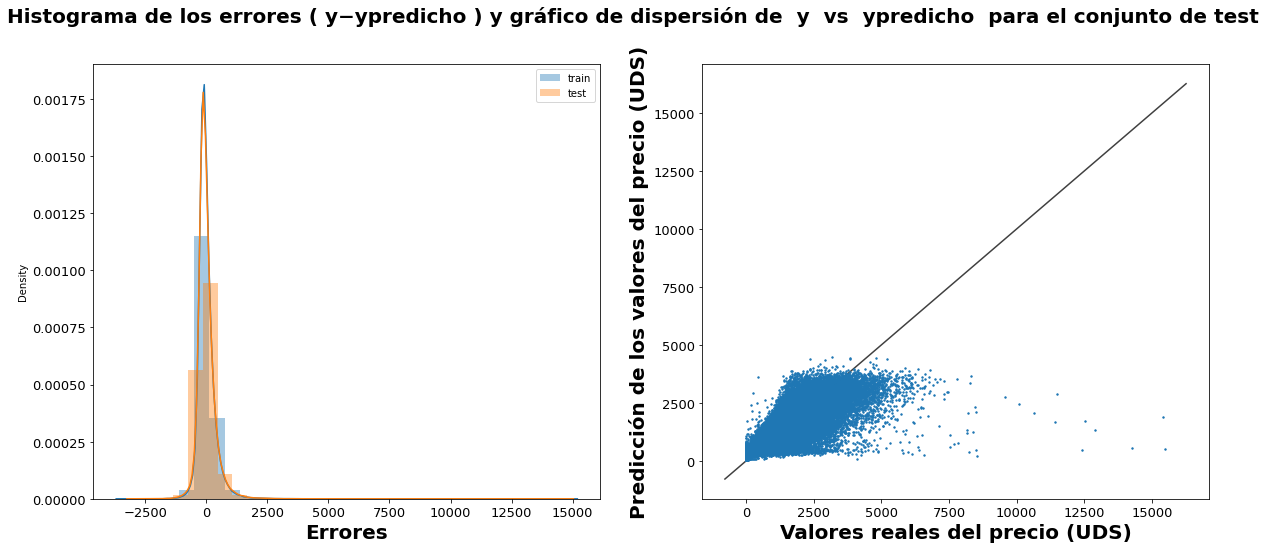

In [26]:
#Función de grafico de valores reales vs predichos
# Se grafican los valores reales del precio contra los valores predichos, con el fin de comparar sus resultados.

def show_graficos(X_train, X_test, y_train, y_test,modelo):
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    plt.figure(figsize = (20,8))

    plt.suptitle('Histograma de los errores ( y−ypredicho ) y gráfico de dispersión de  y  vs  ypredicho  para el conjunto de test' , fontweight = 'black', fontsize=20)


    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.xlabel('Errores', fontsize=20,fontweight = 'black')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)       
    plt.xlabel('Valores reales del precio (UDS)',fontsize=20,fontweight = 'black')
    plt.ylabel('Predicción de los valores del precio (UDS)',fontsize=20,fontweight = 'black')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
    return
    plt.tight_layout()
    plt.show() 
    
show_graficos(X_train, X_test, y_train, y_test,rf_ideal_model)

Comparando los valores reales vs los predichos notamos que los datos no tienen un buen ajuste, por ende hay que seguir buscando parametros que mejoren el rendimeinto del modelo implementado.

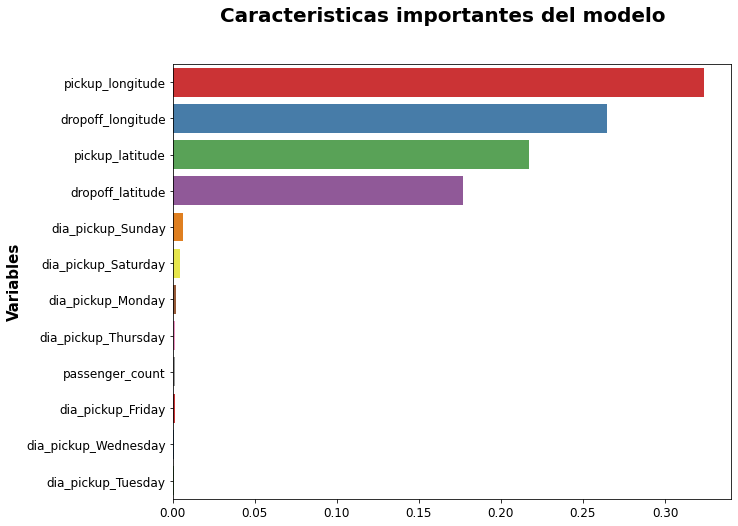

In [27]:
#Funcion para mostrar las caracteriticas importants del modelo

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"Caracteristicas": columns,
                        "": importances})
          .sort_values("", ascending=False))
    
    plt.figure(figsize = (10,8))
    sns.barplot(x="",
                y="Caracteristicas",
                data=df[:n],
                orient="h",
                palette="Set1")
    plt.ylabel("Variables", fontweight = "black", fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.suptitle('Caracteristicas importantes del modelo' , fontweight = 'black', fontsize=20)
    
plot_features(X.columns, rf_ideal_model.feature_importances_)

Las caracteristicas mas importantes del modelo son las latidude y longidud inicial y final, esto indica que la localisación del punto de partida y de llegada son los mas influyentes para la predicción de la duración del viaje. 

# Crime Analysis

In [28]:
# Cargar los datos de properati
df_crime = pd.read_csv("2. Crime Analysis.csv")
df_crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Analisis exploratorio

In [29]:
# número de filas y columnas
df_crime.shape

(878049, 9)

In [30]:
### Información
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [31]:
### Pasar fechas de viaje a formato fecha 

df_crime['Dates'] = pd.to_datetime(df_crime.Dates)

In [32]:
#Resampleo para miarar la cantidad de crimeres por día
year_crim = df_crime.resample('Y',on ='Dates').count()
print(year_crim.shape)
year_crim.head()

(13, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,,
2003-12-31,73902,73902,73902,73902,73902,73902,73902,73902,73902
2004-12-31,73422,73422,73422,73422,73422,73422,73422,73422,73422
2005-12-31,70779,70779,70779,70779,70779,70779,70779,70779,70779
2006-12-31,69909,69909,69909,69909,69909,69909,69909,69909,69909
2007-12-31,68015,68015,68015,68015,68015,68015,68015,68015,68015


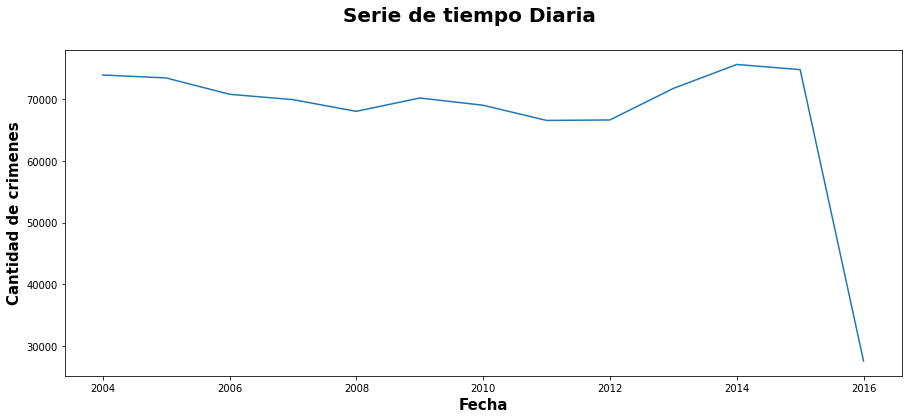

In [33]:
## Comportamiento de los crimenes por año

plt.figure(figsize = (15,6))
plt.suptitle('Serie de tiempo Diaria' , fontweight = 'black', fontsize=20)
plt.plot(year_crim.index, year_crim.Dates)
plt.xlabel('Fecha',fontweight = "black", fontsize = 15)
plt.ylabel('Cantidad de crimenes',fontweight = "black", fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


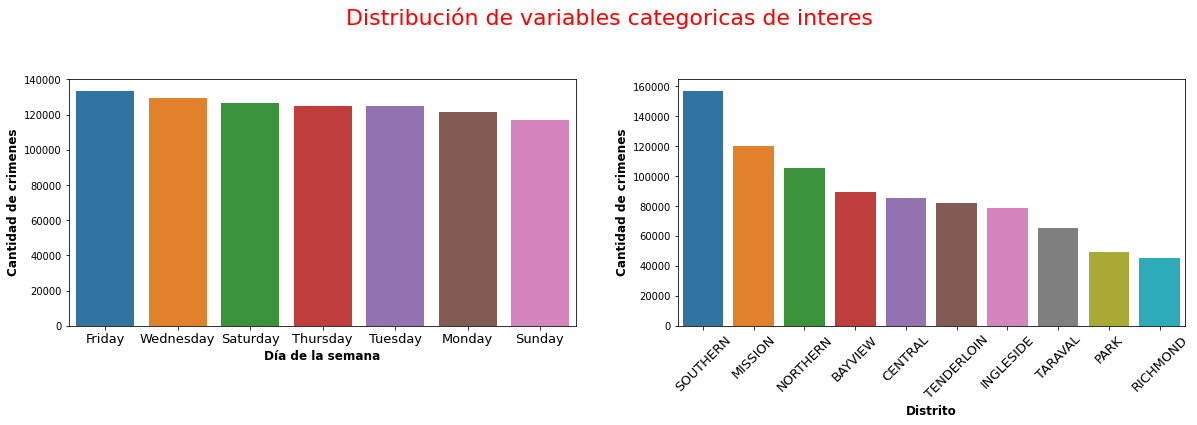

In [34]:
#Realizamos unos gráficos de barra para las variables discretas
plt.figure(figsize = (20,10))
plt.suptitle("Distribución de variables categoricas de interes", fontsize=22, color = "r")


plt.subplot(2,2,1)
sns.countplot(df_crime.DayOfWeek,order= df_crime['DayOfWeek'].value_counts().index)
plt.xlabel("Día de la semana", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de crimenes", fontweight = "black", fontsize = 12);
plt.xticks(fontsize = 13)

plt.subplot(2,2,2)
sns.countplot(df_crime.PdDistrict,order= df_crime['PdDistrict'].value_counts().index)
plt.xlabel("Distrito", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de crimenes", fontweight = "black", fontsize = 12);
plt.xticks(fontsize = 13, rotation = 45);

Los días en los que finaliza la semana son los aquellos en los que mas crimenes se comenten

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


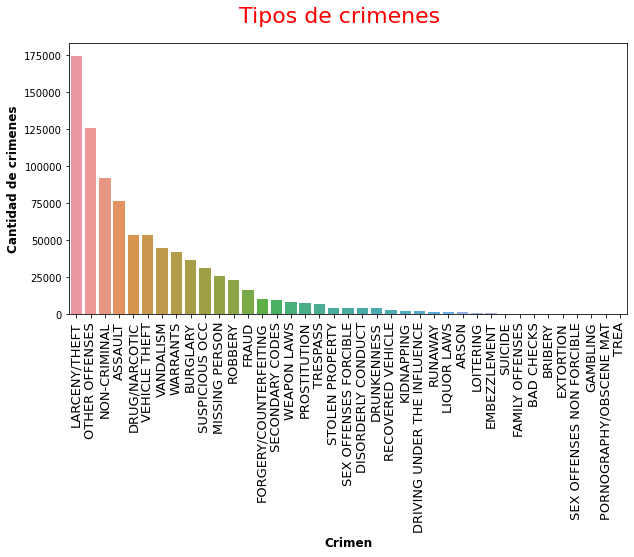

In [35]:
#Realizamos unos gráficos de barra para las variables discretas
plt.figure(figsize = (10,5))
plt.suptitle("Tipos de crimenes", fontsize=22, color = "r")

sns.countplot(df_crime.Category,order= df_crime['Category'].value_counts().index)
plt.xlabel("Crimen", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de crimenes", fontweight = "black", fontsize = 12);
plt.xticks(fontsize = 13, rotation = 90);

El crimen que mas se presenta es el hurto/robo

## Transformación de datos

In [36]:
# Nuevo dataset
df_clean = df_crime.copy()

#Se quitan columnas que no se van a emplear
df_clean.drop(columns = ['Descript','Dates','Address'], inplace = True)

#Renombrar columna
df_clean.rename({"X": "Latitud","Y": "Longitud"}, axis=1, inplace=True)


A continuación se toman las 5 categorias que mas crimenes presentan para el desarrollo del modelo

In [37]:
df_clean.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [38]:
## Se toman las categorias con mayor cantidad de crimenes

df_clean = df_clean.query('Category=="LARCENY/THEFT" | Category=="OTHER OFFENSES" | Category=="NON-CRIMINAL" | Category=="ASSAULT" | Category=="DRUG/NARCOTIC"')

In [39]:
#Se codifican las categorias de la variable objetivo

df_clean["Category"]=df_clean["Category"].replace({"LARCENY/THEFT": 1, "OTHER OFFENSES": 2,"NON-CRIMINAL": 3,"ASSAULT":4, "DRUG/NARCOTIC":5})

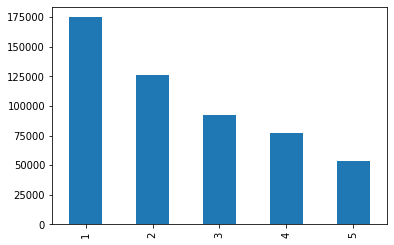

In [40]:
df_clean.Category.value_counts().plot(kind="bar")

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524233 entries, 1 to 878046
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    524233 non-null  int64  
 1   DayOfWeek   524233 non-null  object 
 2   PdDistrict  524233 non-null  object 
 3   Resolution  524233 non-null  object 
 4   Latitud     524233 non-null  float64
 5   Longitud    524233 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 28.0+ MB


## Encoding

In [42]:
# Codificación de la variable DayOfWeek,PdDistrict,manner_of_death

df_clean = pd.get_dummies(df_clean, columns=["DayOfWeek"])
df_clean = pd.get_dummies(df_clean, columns=["PdDistrict"])
df_clean = pd.get_dummies(df_clean, columns=["Resolution"])

## Modelado

In [43]:
# Separar del dataframe dos atributos y las etiquetas. Llamar X a los features e y a las etiquetas
X = df_clean.drop("Category", axis=1)

# Target variable
y = df_clean.Category

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
X_train, X_test, y_train, y_test = train_test_split(X, # variable independiente
                                                    y, # variable dependiente
                                                    test_size = 0.2)

In [45]:
## Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [46]:
# Se ponen los modelos en un diccionario
modelos = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
           "Xgboost":XGBClassifier()}

# Funciòn fit and score models
def fit_y_resultados(modelos, X_train, X_test, y_train, y_test):

    resultado_modelos = {}
    
    for nombre, model in modelos.items():
      
        model.fit(X_train, y_train)
     
        resultado_modelos[nombre] = model.score(X_test, y_test)
    return resultado_modelos

In [47]:
resultado_modelos = fit_y_resultados(modelos=modelos,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
resultado_modelos

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.5269869428786709,
 'Logistic Regression': 0.5209781872633457,
 'Random Forest': 0.5397007067441129,
 'Xgboost': 0.5396244050855056}

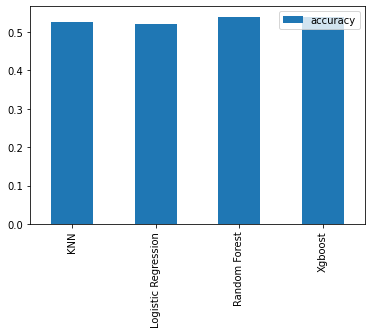

In [48]:
modelo_comparacion = pd.DataFrame(resultado_modelos, index=['accuracy'])
modelo_comparacion.T.plot.bar();

El modelo con mayor exactitud es el Xgboost con un 53.9%, por tanto a dicho modelo se procede a agregarle los parametros n_estimators, max_depth al modelo, con la finalidad de aumentar los scores del modelo.

In [49]:
## Modelado
xg = XGBClassifier(n_estimators=110, max_depth=15)
xg.fit(X_train, y_train)

XGBClassifier(max_depth=15, n_estimators=110, objective='multi:softprob')

In [53]:
#Evaluar modelo
xg.score(X_test, y_test)

0.5701832193577308

Al agregar más número de arboles(n_estimators) con más profundidad (max_depth) se mejora el Auc del modelo, aunque no es muy singnificante el % de accuracy.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


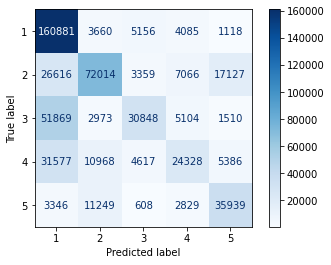

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xg, X, y, cmap=plt.cm.Blues, values_format = '.0f');

In [54]:
# Se hacen las predicciones con el ultimo modelo con optimización
y_preds = xg.predict(X_test)

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.57      0.89      0.69     35162
           2       0.64      0.51      0.57     25157
           3       0.61      0.30      0.40     18307
           4       0.43      0.23      0.30     15479
           5       0.53      0.60      0.56     10742

    accuracy                           0.57    104847
   macro avg       0.56      0.51      0.51    104847
weighted avg       0.57      0.57      0.54    104847



Al evaluar las metricas se puede decir que el modelo implementado no presenta buenas estimaciones, ya que indicadores como precision, rcall y f1 estan bajos.Se debe seguir optimizando parametros o empleando otros modelos que permitan mejorar las mismas.

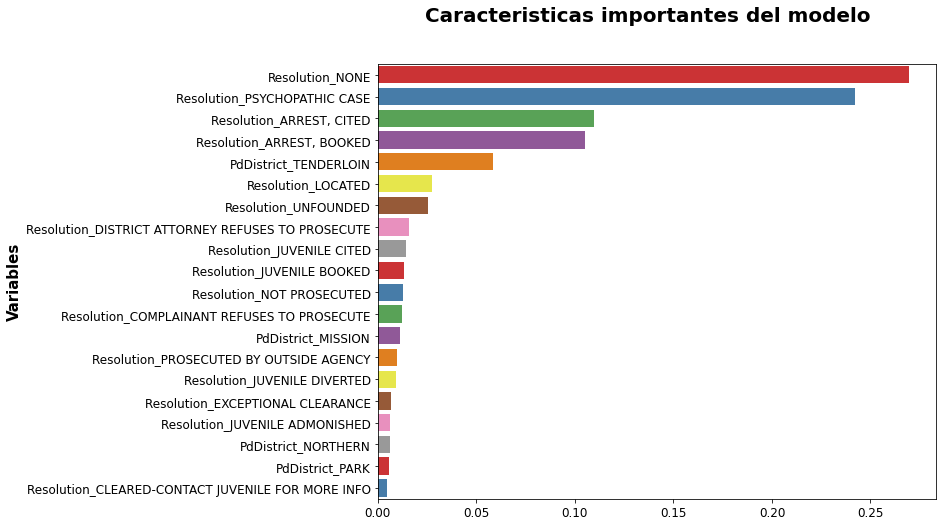

In [56]:
###Caracteristicas importantes del modelo
plot_features(X.columns, xg.feature_importances_)

Los tipos de resoluciones son las variables que mas influyen en el modelo